In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Задача: Используя тип нейронной сети RNN LSTM сделайте прогноз развития уровня углекислого газа, используя следующие данные.
Поле “interpolated” содержит тренд развития уровня CO2, поля “year” и “month” содержат год и месяц соответственно




In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math


# Преобразуем данные в последовательности
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [29]:
data = pd.read_csv('co2_mm_mlo.csv', sep=';')
data.head(10)


,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,-99.99,317.10
4,1958,7,1958.542,315.86,315.86
5,1958,8,1958.625,314.93,314.93
6,1958,9,1958.708,313.20,313.20
7,1958,10,1958.792,-99.99,312.66
8,1958,11,1958.875,313.33,313.33
9,1958,12,1958.958,314.67,314.67


In [30]:
# Нормализуем данные
scaler = MinMaxScaler(feature_range=(0, 1))
data['normalized'] = scaler.fit_transform(data['interpolated'].values.reshape(-1,1))

In [31]:
# Делим данные на тренировочную и тестовую выборки
train_data = data[data['year'] < 2010]
test_data = data[data['year'] >= 2010]

# Преобразуем данные в последовательности
look_back = 3
trainX, trainY = create_dataset(train_data['normalized'].values, look_back)
testX, testY = create_dataset(test_data['normalized'].values, look_back)

# Форма данных для подачи в LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=30, batch_size=32)

Epoch 1/30
20/20 [==============================] - 1s 1ms/step - loss: 0.1369
Epoch 2/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0650
Epoch 3/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 4/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 5/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 6/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 7/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 8/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 9/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 10/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 11/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 12/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 13/30
20/20 [==============================

RMSE означает Root Mean Square Error (квадратный корень из среднего квадратичного отклонения). Это популярная метрика для оценки качества моделей машинного обучения, особенно в задачах регрессии.

RMSE измеряет стандартное отклонение разности между предсказанными и реальными значениями. Другими словами, он показывает, насколько предсказание модели отклоняется от фактического значения.

Меньшее значение RMSE указывает на меньшую разницу между предсказанными и реальными значениями, что является индикатором более высокого качества модели. Однако, RMSE не идеальна и может быть чувствительна к выбросам. Это означает, что даже одно или несколько очень плохих предсказаний могут значительно увеличить ваше значение RMSE.

In [32]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Преобразуем предсказанные значения к исходному масштабу
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# RMSE (root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 1ms/step
Train Score: 2.22 RMSE
Test Score: 3.74 RMSE


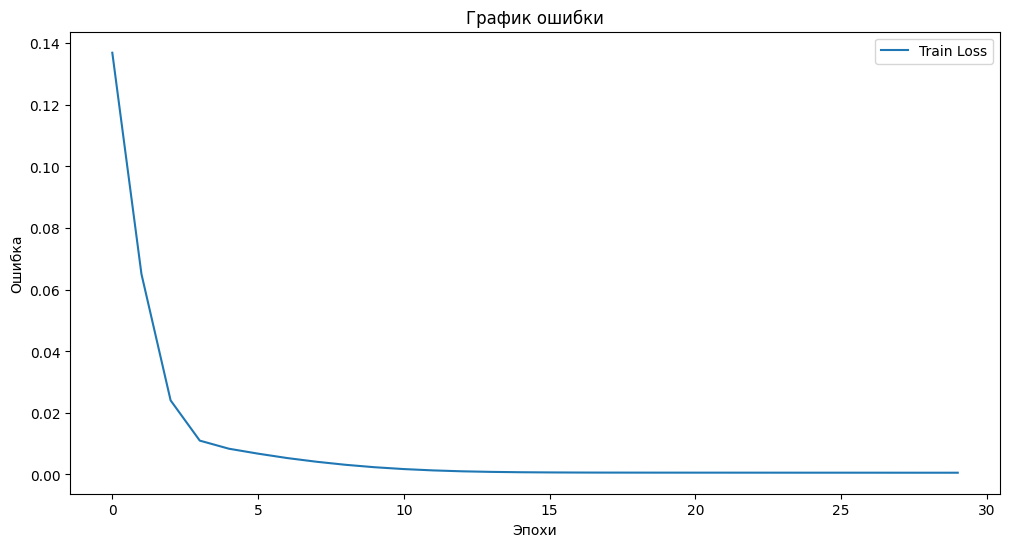

In [33]:
# График ошибки
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('График ошибки')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

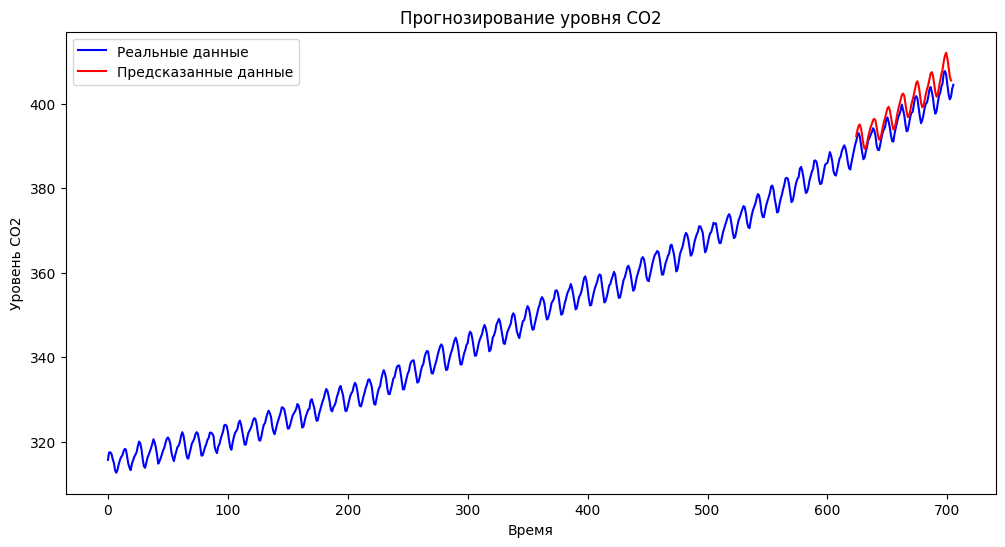

In [34]:
plt.figure(figsize=(12,6))
plt.plot(data['interpolated'].values, color='blue', label='Реальные данные')
plt.plot(range(len(trainPredict)+(2*look_back),len(trainPredict)+len(testPredict)+(2*look_back)), testPredict.flatten(), color='red', label='Предсказанные данные')
plt.title('Прогнозирование уровня CO2')
plt.xlabel('Время')
plt.ylabel('Уровень CO2')
plt.legend()
plt.show()